In [1]:
import sys
import torch
sys.path.append("./PyGame-Learning-Environment")
import pygame as pg
from ple import PLE 
from ple.games.flappybird import FlappyBird
from ple import PLE
import agent

pygame 2.5.2 (SDL 2.28.3, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html
couldn't import doomish
Couldn't import doom


High Score: 66.0


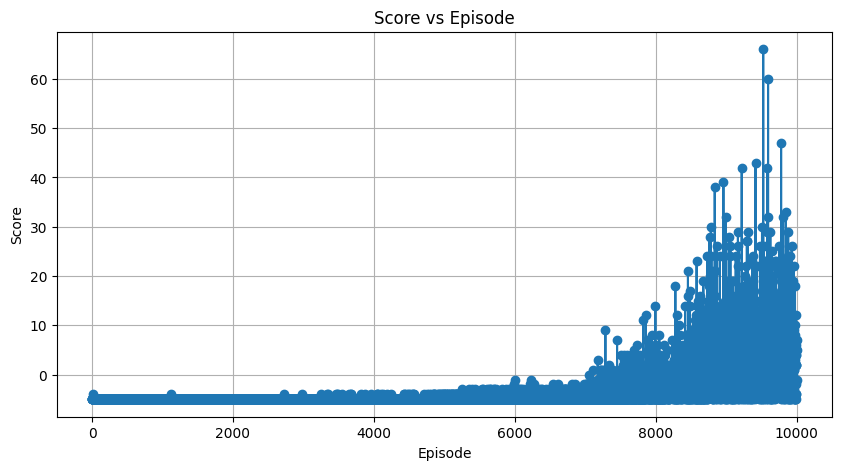

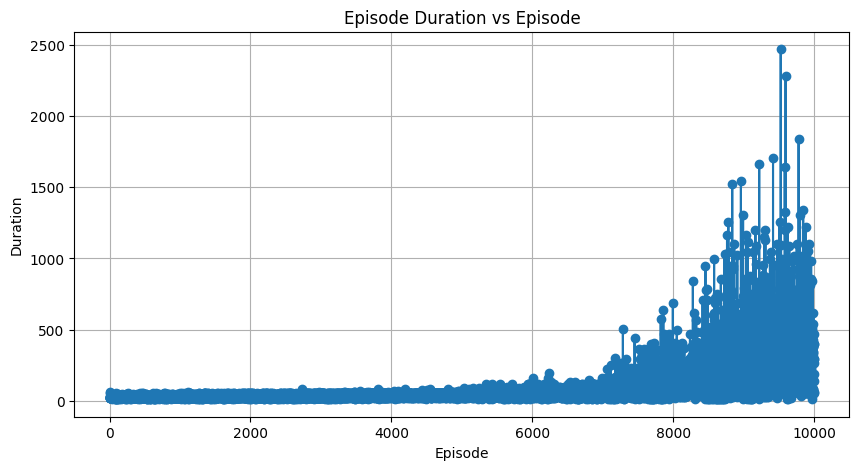

In [2]:
game = FlappyBird(width=256, height=256)
p = PLE(game, display_screen=False)
p.init()
actions = p.getActionSet()
action_dict = {0: actions[1], 1: actions[0]}
state = p.getGameState()
len_state = len(state)
n_actions = len(action_dict)
agent = agent.Agent(BATCH_SIZE=32, MEMORY_SIZE=100000, GAMMA=0.99, input_dim=len_state, output_dim=n_actions, action_dim=n_actions, action_dict=action_dict, EPS_START=1.0, EPS_END=0.05, EPS_DECAY_VALUE=0.999995, TAU = 0.005, network_type='DuelingDQN', lr = 1e-4)
agent.train(episodes=10000, env=p)
pg.quit()
print("High Score:",agent.highest_score)
agent.plot_stats()
torch.save(agent.policy_net.state_dict(), 'model.pth')